# Step 01
# Preprocessing input images and annotations

In [1]:
%matplotlib inline

In [2]:
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())

/mnt/mbi/home/e0031038/.local/share/jupyter


In [3]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np

import pathlib
from tqdm import tqdm

import skimage.io
import skimage.segmentation

import utils.dirtools
import utils.augmentation
from config import config_vars

# Configuration

In [4]:
config_vars

{'root_directory': 'src/',
 'max_training_images': 0,
 'create_split_files': True,
 'training_fraction': 0.5,
 'validation_fraction': 0.25,
 'transform_images_to_PNG': True,
 'pixel_depth': 8,
 'min_nucleus_size': 25,
 'boundary_size': 2,
 'augment_images': False,
 'elastic_points': 16,
 'elastic_distortion': 5,
 'elastic_augmentations': 10,
 'learning_rate': 0.0001,
 'epochs': 50,
 'steps_per_epoch': 500,
 'batch_size': 10,
 'val_batch_size': 10,
 'rescale_labels': True,
 'crop_size': 256,
 'cell_min_size': 16,
 'boundary_boost_factor': 1,
 'object_dilation': 3,
 'raw_images_dir': 'src/raw_images/',
 'raw_annotations_dir': 'src/raw_annotations/',
 'path_files_training': 'src/training.txt',
 'path_files_validation': 'src/validation.txt',
 'path_files_test': 'src/test.txt',
 'normalized_images_dir': 'src/norm_images/',
 'boundary_labels_dir': 'src/boundary_labels/'}

# Data partitions

In [5]:
# Prepare split files

if config_vars["create_split_files"]:
    file_list = os.listdir(config_vars["raw_images_dir"])
    [list_training, list_test, list_validation] = utils.dirtools.create_image_lists(
        config_vars["raw_images_dir"],
        config_vars["training_fraction"],
        config_vars["validation_fraction"])
    

    utils.dirtools.write_path_files(config_vars["path_files_training"], list_training)
    utils.dirtools.write_path_files(config_vars["path_files_test"], list_test)
    utils.dirtools.write_path_files(config_vars["path_files_validation"], list_validation) 
data_partitions = utils.dirtools.read_data_partitions(config_vars, load_augmented=False)

In [6]:
# Create output directories for transformed data

os.makedirs(config_vars["normalized_images_dir"], exist_ok=True)
os.makedirs(config_vars["boundary_labels_dir"], exist_ok=True)

# Image Preprocessing

In [7]:
if config_vars["transform_images_to_PNG"]:
    
    filelist = sorted(os.listdir(config_vars["raw_images_dir"]))

    # run over all raw images
    for filename in tqdm(filelist):
        print(filename)

        # load image and its annotation
        orig_img = skimage.io.imread(config_vars["raw_images_dir"] + filename)       
        

        # IMAGE

        # normalize to [0,1]
        percentile = 99.9
        high = np.percentile(orig_img, percentile)
        low = np.percentile(orig_img, 100-percentile)

        img = np.minimum(high, orig_img)
        img = np.maximum(low, img)

        img = (img - low) / (high - low) # gives float64, thus cast to 8 bit later
        img = skimage.img_as_ubyte(img) 

        skimage.io.imsave(config_vars["normalized_images_dir"] + filename[:-3] + 'png', img)
        print(config_vars["normalized_images_dir"])
else:
    config_vars["normalized_images_dir"] = config_vars["raw_images_dir"]

  0%|          | 0/37 [00:00<?, ?it/s]

movie_2_nucleus_working_raw_t002_z020.png


  3%|▎         | 1/37 [00:00<00:12,  2.90it/s]

src/norm_images/
movie_2_nucleus_working_raw_t005_z016.png


  5%|▌         | 2/37 [00:00<00:11,  2.95it/s]

src/norm_images/
movie_2_nucleus_working_raw_t010_z016.png


  8%|▊         | 3/37 [00:01<00:11,  2.96it/s]

src/norm_images/
movie_2_nucleus_working_raw_t025_z015.png


 11%|█         | 4/37 [00:01<00:11,  2.87it/s]

src/norm_images/
movie_2_nucleus_working_raw_t026_z006.png


 14%|█▎        | 5/37 [00:01<00:11,  2.79it/s]

src/norm_images/
movie_2_nucleus_working_raw_t032_z023.png


 16%|█▌        | 6/37 [00:02<00:11,  2.66it/s]

src/norm_images/
movie_2_nucleus_working_raw_t035_z020.png


 19%|█▉        | 7/37 [00:02<00:11,  2.69it/s]

src/norm_images/
movie_2_nucleus_working_raw_t035_z029.png


 22%|██▏       | 8/37 [00:02<00:11,  2.62it/s]

src/norm_images/
movie_2_nucleus_working_raw_t042_z025.png


 24%|██▍       | 9/37 [00:03<00:10,  2.64it/s]

src/norm_images/
movie_2_nucleus_working_raw_t044_z006.png


 27%|██▋       | 10/37 [00:03<00:10,  2.66it/s]

src/norm_images/
movie_2_nucleus_working_raw_t060_z027.png


 30%|██▉       | 11/37 [00:04<00:10,  2.59it/s]

src/norm_images/
movie_2_nucleus_working_raw_t072_z026.png


 32%|███▏      | 12/37 [00:04<00:10,  2.46it/s]

src/norm_images/
movie_2_nucleus_working_raw_t077_z013.png


 35%|███▌      | 13/37 [00:05<00:10,  2.35it/s]

src/norm_images/
movie_2_nucleus_working_raw_t081_z027.png


 38%|███▊      | 14/37 [00:05<00:10,  2.30it/s]

src/norm_images/
movie_2_nucleus_working_raw_t094_z023.png


 41%|████      | 15/37 [00:05<00:09,  2.26it/s]

src/norm_images/
movie_2_nucleus_working_raw_t103_z008.png


 43%|████▎     | 16/37 [00:06<00:09,  2.24it/s]

src/norm_images/
movie_2_nucleus_working_raw_t104_z006.png


 46%|████▌     | 17/37 [00:06<00:09,  2.14it/s]

src/norm_images/
movie_2_nucleus_working_raw_t112_z022.png


 49%|████▊     | 18/37 [00:07<00:09,  2.10it/s]

src/norm_images/
movie_2_nucleus_working_raw_t121_z014.png


 51%|█████▏    | 19/37 [00:07<00:08,  2.21it/s]

src/norm_images/
movie_2_nucleus_working_raw_t130_z004.png


 54%|█████▍    | 20/37 [00:08<00:07,  2.27it/s]

src/norm_images/
movie_2_nucleus_working_raw_t157_z009.png


 57%|█████▋    | 21/37 [00:08<00:07,  2.28it/s]

src/norm_images/
movie_2_nucleus_working_raw_t171_z003.png


 59%|█████▉    | 22/37 [00:09<00:06,  2.17it/s]

src/norm_images/
movie_2_nucleus_working_raw_t182_z027.png


 62%|██████▏   | 23/37 [00:09<00:06,  2.09it/s]

src/norm_images/
movie_2_nucleus_working_raw_t193_z018.png


 65%|██████▍   | 24/37 [00:10<00:06,  2.07it/s]

src/norm_images/
movie_2_nucleus_working_raw_t193_z020.png


 68%|██████▊   | 25/37 [00:10<00:05,  2.04it/s]

src/norm_images/
movie_2_nucleus_working_raw_t235_z023.png


 70%|███████   | 26/37 [00:11<00:06,  1.76it/s]

src/norm_images/
movie_2_nucleus_working_raw_t273_z014.png


 76%|███████▌  | 28/37 [00:12<00:04,  2.00it/s]

src/norm_images/
test_1.png
src/norm_images/
test_10.png


 81%|████████  | 30/37 [00:12<00:02,  2.78it/s]

src/norm_images/
test_2.png
src/norm_images/
test_3.png


 86%|████████▋ | 32/37 [00:13<00:01,  3.85it/s]

src/norm_images/
test_4.png
src/norm_images/
test_5.png


 89%|████████▉ | 33/37 [00:13<00:01,  3.83it/s]

src/norm_images/
test_6.png


 92%|█████████▏| 34/37 [00:13<00:00,  3.71it/s]

src/norm_images/
test_7.png


 95%|█████████▍| 35/37 [00:14<00:00,  3.68it/s]

src/norm_images/
test_8.png


 97%|█████████▋| 36/37 [00:14<00:00,  3.58it/s]

src/norm_images/
test_9.png


100%|██████████| 37/37 [00:14<00:00,  2.53it/s]

src/norm_images/


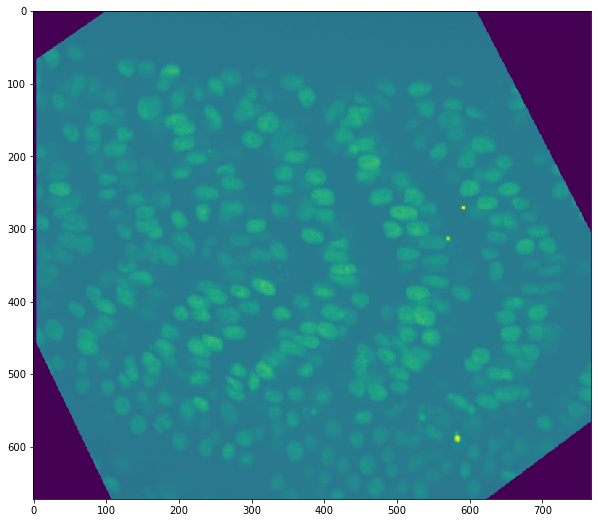

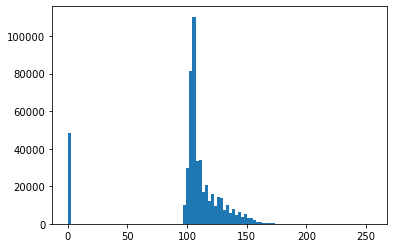

In [8]:
#print(img.dtype, img.shape)
filename = os.listdir(config_vars["normalized_images_dir"])
img = skimage.io.imread(config_vars["normalized_images_dir"] + filename[-1])
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
plt.hist(img.flatten(), bins=100)
plt.show()

# Create Output Targets: Three Class Boundary

In [ ]:
filelist = sorted(os.listdir(config_vars["raw_annotations_dir"]))
total_objects = 0

# run over all raw images
for filename in tqdm(filelist):
    print(filelist)
    print(filename)
    
    # GET ANNOTATION
    annot = skimage.io.imread(config_vars["raw_annotations_dir"] + filename)
    
    # strip the first channel
    if len(annot.shape) == 3:
        annot = annot[:,:,0]
    
    # label the annotations nicely to prepare for future filtering operation
    annot = skimage.morphology.label(annot)
    total_objects += len(np.unique(annot)) - 1
    
    # filter small objects, e.g. micronulcei
    annot = skimage.morphology.remove_small_objects(annot, min_size=config_vars["min_nucleus_size"])
    
    # find boundaries
    boundaries = skimage.segmentation.find_boundaries(annot)

    for k in range(2, config_vars["boundary_size"], 2):
        boundaries = skimage.morphology.binary_dilation(boundaries)
        
    # BINARY LABEL
    
    # prepare buffer for binary label
    label_binary = np.zeros((annot.shape + (3,)))
    
    # write binary label
    label_binary[(annot == 0) & (boundaries == 0), 0] = 1
    label_binary[(annot != 0) & (boundaries == 0), 1] = 1
    label_binary[boundaries == 1, 2] = 1
    
    # save it - converts image to range from 0 to 255
    skimage.io.imsave(config_vars["boundary_labels_dir"] + filename, label_binary)
    
print("Total objects: ",total_objects)

  1%|▏         | 1/78 [00:00<00:09,  7.78it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

  4%|▍         | 3/78 [00:00<00:10,  7.41it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  6%|▋         | 5/78 [00:00<00:10,  7.09it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

  9%|▉         | 7/78 [00:00<00:09,  7.20it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 12%|█▏        | 9/78 [00:01<00:09,  7.09it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 14%|█▍        | 11/78 [00:01<00:09,  6.92it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 17%|█▋        | 13/78 [00:01<00:09,  6.99it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 19%|█▉        | 15/78 [00:02<00:08,  7.06it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 22%|██▏       | 17/78 [00:02<00:08,  6.94it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 24%|██▍       | 19/78 [00:02<00:08,  7.21it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 27%|██▋       | 21/78 [00:02<00:07,  7.41it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 29%|██▉       | 23/78 [00:03<00:07,  7.33it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 32%|███▏      | 25/78 [00:03<00:06,  7.58it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 35%|███▍      | 27/78 [00:03<00:06,  7.94it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 37%|███▋      | 29/78 [00:03<00:06,  7.67it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 38%|███▊      | 30/78 [00:04<00:09,  5.21it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 40%|███▉      | 31/78 [00:04<00:11,  4.23it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 41%|████      | 32/78 [00:04<00:12,  3.74it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 42%|████▏     | 33/78 [00:05<00:12,  3.55it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 44%|████▎     | 34/78 [00:05<00:14,  3.06it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 45%|████▍     | 35/78 [00:06<00:14,  2.90it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 46%|████▌     | 36/78 [00:06<00:14,  2.89it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 47%|████▋     | 37/78 [00:06<00:14,  2.81it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 49%|████▊     | 38/78 [00:07<00:14,  2.76it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 51%|█████▏    | 40/78 [00:07<00:10,  3.48it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 54%|█████▍    | 42/78 [00:07<00:07,  4.63it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 56%|█████▋    | 44/78 [00:08<00:06,  5.46it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 59%|█████▉    | 46/78 [00:08<00:05,  5.48it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 62%|██████▏   | 48/78 [00:09<00:05,  5.52it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 64%|██████▍   | 50/78 [00:09<00:04,  5.98it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 67%|██████▋   | 52/78 [00:09<00:04,  5.94it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 69%|██████▉   | 54/78 [00:10<00:04,  5.70it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 72%|███████▏  | 56/78 [00:10<00:03,  5.93it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 74%|███████▍  | 58/78 [00:10<00:03,  6.19it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 77%|███████▋  | 60/78 [00:10<00:02,  6.66it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 79%|███████▉  | 62/78 [00:11<00:02,  6.83it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 82%|████████▏ | 64/78 [00:11<00:02,  6.65it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 85%|████████▍ | 66/78 [00:11<00:01,  7.15it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 87%|████████▋ | 68/78 [00:12<00:01,  7.13it/s]

['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 88%|████████▊ | 69/78 [00:12<00:01,  5.11it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 90%|████████▉ | 70/78 [00:12<00:02,  3.92it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


['movie_2_nucleus_working_raw_t001_z001.png', 'movie_2_nucleus_working_raw_t001_z002.png', 'movie_2_nucleus_working_raw_t001_z003.png', 'movie_2_nucleus_working_raw_t001_z004.png', 'movie_2_nucleus_working_raw_t001_z005.png', 'movie_2_nucleus_working_raw_t001_z006.png', 'movie_2_nucleus_working_raw_t001_z007.png', 'movie_2_nucleus_working_raw_t001_z008.png', 'movie_2_nucleus_working_raw_t001_z009.png', 'movie_2_nucleus_working_raw_t001_z010.png', 'movie_2_nucleus_working_raw_t001_z011.png', 'movie_2_nucleus_working_raw_t001_z012.png', 'movie_2_nucleus_working_raw_t001_z013.png', 'movie_2_nucleus_working_raw_t001_z014.png', 'movie_2_nucleus_working_raw_t001_z015.png', 'movie_2_nucleus_working_raw_t001_z016.png', 'movie_2_nucleus_working_raw_t001_z017.png', 'movie_2_nucleus_working_raw_t001_z018.png', 'movie_2_nucleus_working_raw_t001_z019.png', 'movie_2_nucleus_working_raw_t001_z020.png', 'movie_2_nucleus_working_raw_t001_z021.png', 'movie_2_nucleus_working_raw_t001_z022.png', 'movie_2_

 91%|█████████ | 71/78 [00:13<00:01,  3.59it/s]

int64 (880, 1206)


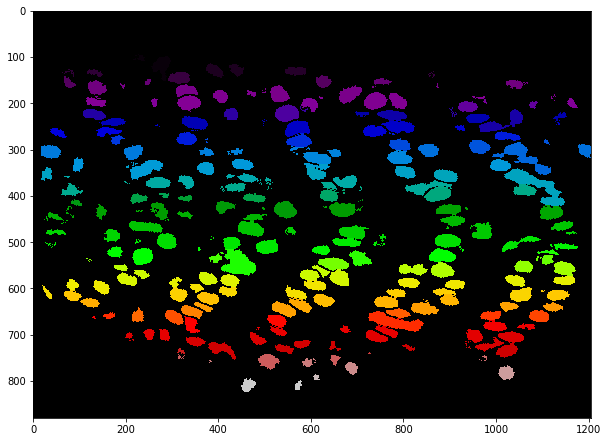

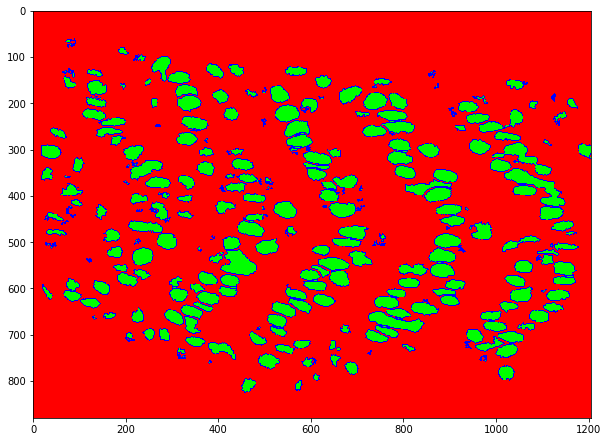

In [10]:
# Show example image 
print(annot.dtype, annot.shape)

# plot original annotation
plt.figure(figsize=(10,10))
plt.imshow(annot, cmap="nipy_spectral")
plt.show()

# plot boundary labels
plt.figure(figsize=(10,10))
plt.imshow(label_binary)
plt.show()
